In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import pathlib

In [12]:
mainpath = pathlib.Path("H:/UGS_Flux/Data_Processing/Phrag/")

In [13]:
# Load the newly uploaded OpenET data from the Excel file
openet_data = pd.read_excel(mainpath / "open_et_data.xlsx")

# Display the first few rows of the OpenET data to understand its structure
openet_data.set_index("Month",inplace=True)


In [19]:
data


,TIMESTAMP_START,TIMESTAMP_END,CO2,CO2_SIGMA,H2O,H2O_SIGMA,FC,FC_SSITC_TEST,LE,LE_SSITC_TEST,...,PBLH,TS_1_1_1,SWC_1_1_1,ALB,NETRAD,SW_IN,SW_OUT,LW_IN,LW_OUT,P
0,202406112016,202406112030,449.6338,10.087680,11.21100,0.916360,2.507885,5,15.633500,5,...,113.7365,17.96195,NAN,0,NAN,NAN,NAN,NAN,NAN,0
1,202406112030,202406112100,471.0018,9.501314,12.03324,0.400201,3.554912,7,12.931170,7,...,118.0222,17.93797,NAN,0,NAN,NAN,NAN,NAN,NAN,0
2,202406112100,202406112130,496.6748,23.125800,12.32706,0.328373,14.055360,4,20.117880,4,...,118.0014,17.90574,NAN,0,NAN,NAN,NAN,NAN,NAN,0
3,202406112130,202406112200,485.1836,5.719377,11.58605,0.342814,3.047812,7,9.130482,7,...,114.9291,17.89695,NAN,0,NAN,NAN,NAN,NAN,NAN,0
4,202406112200,202406112230,518.6822,14.536640,11.82272,0.217925,10.374590,4,15.650200,3,...,118.8991,17.88423,NAN,0,NAN,NAN,NAN,NAN,NAN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,202406211100,202406211130,410.1972,6.106011,12.42247,1.965141,-14.035010,4,275.561200,2,...,1496.0780,16.33837,NAN,0,NAN,NAN,NAN,NAN,NAN,0
463,202406211130,202406211200,407.3469,10.619330,12.86912,2.056606,-17.346770,3,190.519000,3,...,134.2666,16.31370,NAN,0,NAN,NAN,NAN,NAN,NAN,0
464,202406211200,202406211230,400.1834,12.876690,13.74655,2.575000,-16.387420,3,152.004300,3,...,132.2452,16.33459,NAN,0,NAN,NAN,NAN,NAN,NAN,0
465,202406211230,202406211300,406.9701,5.326537,13.93457,1.057522,-4.757221,7,43.928980,7,...,139.7038,16.35130,NAN,0,NAN,NAN,NAN,NAN,NAN,0


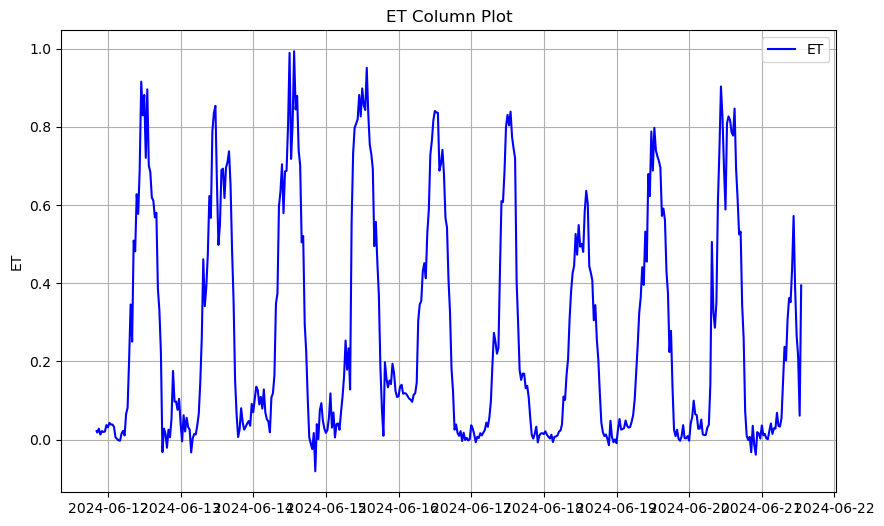

In [24]:

# Load the dataset

data = pd.read_csv(mainpath / "8442_Flux_AmeriFluxFormat_3.dat")
# Convert the TIMESTAMP_START column to datetime format
data['TIMESTAMP_START'] = pd.to_datetime(data['TIMESTAMP_START'], format='%Y%m%d%H%M')
data.set_index('TIMESTAMP_START',inplace=True)


# Convert ET from mm to inches (1 mm = 0.0393701 inches)
data['ET_inches'] = data['ET'] * 0.0393701

# Resample the data to daily values and sum the ET_inches
daily_et = data['ET_inches'].resample('D').sum()


# Plot the ET column
plt.figure(figsize=(10, 6))
plt.plot(data["ET"], label='ET', color='blue')

plt.ylabel('ET')
plt.title('ET Column Plot')
plt.legend()
plt.grid(True)
plt.show()

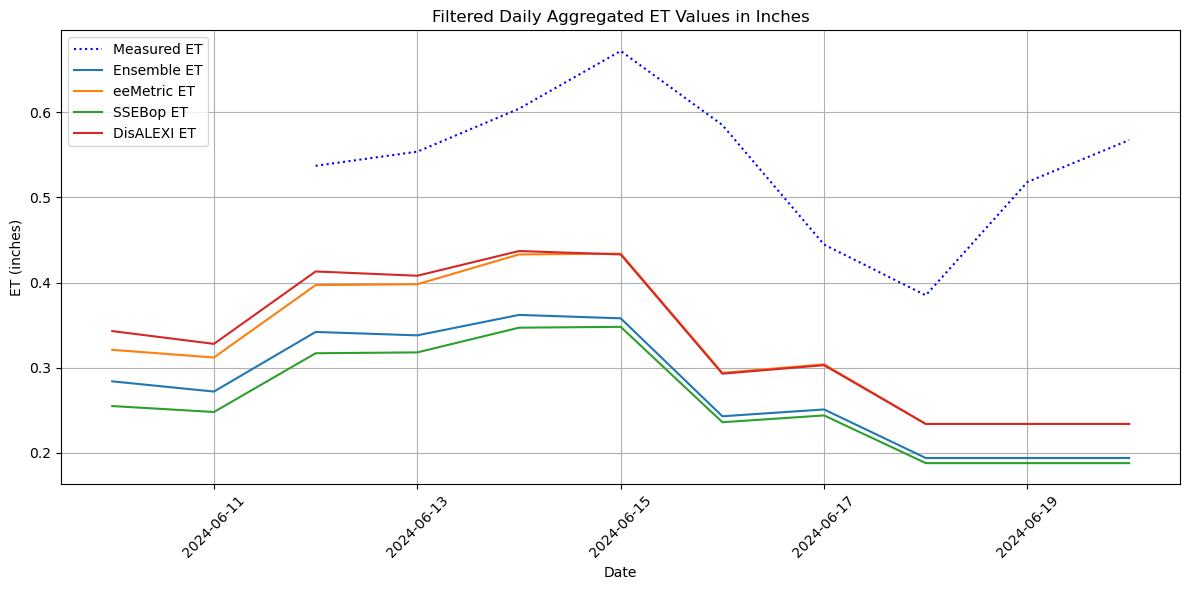

In [30]:
# Filter out the data from 2024-06-11 and 2024-06-21
filtered_daily_et = daily_et.drop(['2024-06-11', '2024-06-21'])
openet_data = openet_data[(openet_data.index > pd.to_datetime('2024-06-09')) & (openet_data.index < pd.to_datetime('2024-06-21'))]
# Plot the filtered daily aggregated ET values in inches
plt.figure(figsize=(12, 6))
plt.plot(filtered_daily_et.index, filtered_daily_et, label='Measured ET', color='blue', linestyle = ":")

for col in openet_data:
    plt.plot(openet_data.index, openet_data[col], label=col)

plt.xlabel('Date')
plt.ylabel('ET (inches)')
plt.title('Filtered Daily Aggregated ET Values in Inches')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

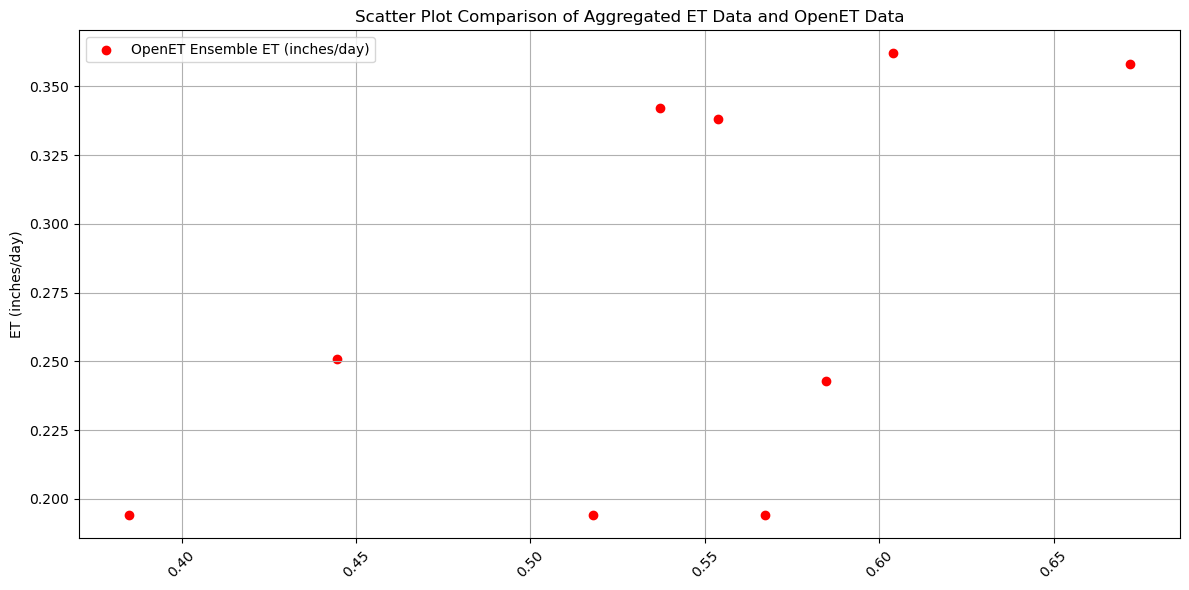

In [2]:


# Data
comparison_data = {
    'Date': [
        '2024-06-12', '2024-06-13', '2024-06-14', '2024-06-15', '2024-06-16', '2024-06-17', 
        '2024-06-18', '2024-06-19', '2024-06-20'
    ],
    'Aggregated ET (inches/day)': [
        0.537057, 0.553667, 0.604062, 0.671916, 0.584903, 0.444572, 0.384966, 0.518095, 0.567288
    ],
    'OpenET Ensemble ET (inches/day)': [
        0.342, 0.338, 0.362, 0.358, 0.243, 0.251, 0.194, 0.194, 0.194
    ]
}

# Convert to DataFrame
comparison_df = pd.DataFrame(comparison_data)
comparison_df['Date'] = pd.to_datetime(comparison_df['Date'])

# Generate scatter plot comparison
plt.figure(figsize=(12, 6))

plt.scatter(comparison_df['Aggregated ET (inches/day)'], comparison_df['OpenET Ensemble ET (inches/day)'], label='OpenET Ensemble ET (inches/day)', color='red')

plt.ylabel('ET (inches/day)')
plt.title('Scatter Plot Comparison of Aggregated ET Data and OpenET Data')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

